Data Source: P. Cortez. "Student Performance," UCI Machine Learning Repository, 2008. [Online]. Available: https://doi.org/10.24432/C5TG7T.

Importing Necessary Python Libraries: Pandas, Numpy, Matplotlib and Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading a ';' separated csv file with pandas

In [2]:
df = pd.read_csv('student-mat.csv', sep=';')
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Showing Column Names

In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Showing the shape of the dataset, it has 395 rows and 33 columns

In [4]:
df.shape

(395, 33)

Looking for any Null or missing values in the dataset, there is none.

In [5]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No need for 33 columns, will reduce to 15 columns
school, sex, age, address, reason, traveltime, studytime, famsup, activities, higher, internet, goout, health, absences, g3

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
st = df[['school', 'sex', 'age', 'address','reason','traveltime', 'studytime','famsup', 'activities',
       'higher', 'internet',  'goout', 'health', 'absences', 'G3']]

In [8]:
st.head()

,school,sex,age,address,reason,traveltime,studytime,famsup,activities,higher,internet,goout,health,absences,G3
0,GP,F,18,U,course,2,2,no,no,yes,no,4,3,6,6
1,GP,F,17,U,course,1,2,yes,no,yes,yes,3,3,4,6
2,GP,F,15,U,other,1,2,no,no,yes,yes,2,3,10,10
3,GP,F,15,U,home,1,3,yes,yes,yes,yes,2,5,2,15
4,GP,F,16,U,home,1,2,yes,no,yes,no,2,5,4,10


Renaming some column names for convenience

In [9]:
st = st.rename(columns={'sex': 'Gender', 'age':'Age', 'address': 'Location', 'traveltime': 'Travel_Time', 'studytime': 'Weekly_Study_Time', 'famsup':'Family_Support', 'activities': 'Extra_Curricular','higher': 'Higher_Ed_Exp','internet':'Internet_Availability','goout':'Goint_Out','health':'Health_Status','absences':'Absences_from_School','G3':'Final Grade'})

In [10]:
st

,school,Gender,Age,Location,reason,Travel_Time,Weekly_Study_Time,Family_Support,Extra_Curricular,Higher_Ed_Exp,Internet_Availability,Goint_Out,Health_Status,Absences_from_School,Final Grade
0,GP,F,18,U,course,2,2,no,no,yes,no,4,3,6,6
1,GP,F,17,U,course,1,2,yes,no,yes,yes,3,3,4,6
2,GP,F,15,U,other,1,2,no,no,yes,yes,2,3,10,10
3,GP,F,15,U,home,1,3,yes,yes,yes,yes,2,5,2,15
4,GP,F,16,U,home,1,2,yes,no,yes,no,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,course,1,2,yes,no,yes,no,4,4,11,9
391,MS,M,17,U,course,2,1,no,no,yes,yes,5,2,3,16
392,MS,M,21,R,course,1,1,no,no,yes,no,3,3,3,7
393,MS,M,18,R,course,3,1,no,no,yes,yes,1,5,0,10


Changing some categorical values from some columns

In [11]:
st['Gender'] = st['Gender'].replace({'M':'Male', 'F':'Female'})

In [12]:
st['Location'] = st['Location'].replace({'U':'Urban', 'R':'Rural'})

In [13]:
st['Travel_Time'] = st['Travel_Time'].replace({
    1:'<15 mins',
    2:'15 to 30 mins',
    3:'30 mins to 1 hour',
    4:'>1 hour',
})

In [14]:
st['Travel_Time'] = df['traveltime']
st['Travel_Time'] = st['Travel_Time'].replace({
    1:'<15 mins',
    2:'15 to 30 mins',
    3:'30 mins to 1 hour',
    4:'>1 hour',
})
st.head()

,school,Gender,Age,Location,reason,Travel_Time,Weekly_Study_Time,Family_Support,Extra_Curricular,Higher_Ed_Exp,Internet_Availability,Goint_Out,Health_Status,Absences_from_School,Final Grade
0,GP,Female,18,Urban,course,15 to 30 mins,2,no,no,yes,no,4,3,6,6
1,GP,Female,17,Urban,course,<15 mins,2,yes,no,yes,yes,3,3,4,6
2,GP,Female,15,Urban,other,<15 mins,2,no,no,yes,yes,2,3,10,10
3,GP,Female,15,Urban,home,<15 mins,3,yes,yes,yes,yes,2,5,2,15
4,GP,Female,16,Urban,home,<15 mins,2,yes,no,yes,no,2,5,4,10


In [15]:
st['Travel_Time'] = st['Travel_Time'].replace({
    1:'<15 mins',
    2:'15 to 30 mins',
    3:'30 mins to 1 hour',
    4:'>1 hour',
})

Dropping 'reason' column because I don't think it's useful

In [16]:
st.drop('reason', axis=1,inplace=True)
st.head()

,school,Gender,Age,Location,Travel_Time,Weekly_Study_Time,Family_Support,Extra_Curricular,Higher_Ed_Exp,Internet_Availability,Goint_Out,Health_Status,Absences_from_School,Final Grade
0,GP,Female,18,Urban,15 to 30 mins,2,no,no,yes,no,4,3,6,6
1,GP,Female,17,Urban,<15 mins,2,yes,no,yes,yes,3,3,4,6
2,GP,Female,15,Urban,<15 mins,2,no,no,yes,yes,2,3,10,10
3,GP,Female,15,Urban,<15 mins,3,yes,yes,yes,yes,2,5,2,15
4,GP,Female,16,Urban,<15 mins,2,yes,no,yes,no,2,5,4,10


In [17]:
st['Weekly_Study_Time'] = st['Weekly_Study_Time'].replace({
    1:'<2 hours',
    2:'2 to 5 hours',
    3:'5 to 10 hours',
    4:'>10 hours',
})

st['Goint_Out'] = st['Goint_Out'].replace({
    1:'Very Low',
    2:'Low',
    3:'Moderate',
    4:'High',
    5:'Very High',
})

st['Health_Status'] = st['Health_Status'].replace({
    1:'Very Bad',
    2:'Bad',
    3:'Moderate',
    4:'Good',
    5:'Very Good',
})
st.head()

,school,Gender,Age,Location,Travel_Time,Weekly_Study_Time,Family_Support,Extra_Curricular,Higher_Ed_Exp,Internet_Availability,Goint_Out,Health_Status,Absences_from_School,Final Grade
0,GP,Female,18,Urban,15 to 30 mins,2 to 5 hours,no,no,yes,no,High,Moderate,6,6
1,GP,Female,17,Urban,<15 mins,2 to 5 hours,yes,no,yes,yes,Moderate,Moderate,4,6
2,GP,Female,15,Urban,<15 mins,2 to 5 hours,no,no,yes,yes,Low,Moderate,10,10
3,GP,Female,15,Urban,<15 mins,5 to 10 hours,yes,yes,yes,yes,Low,Very Good,2,15
4,GP,Female,16,Urban,<15 mins,2 to 5 hours,yes,no,yes,no,Low,Very Good,4,10


In [18]:
st = st.rename(columns={
    'school':'School_Name',
})

In [19]:
st['School_Name'] = st['School_Name'].replace({
    'GP':'Gabriel Pereira',
    'MS':'Mousinho da Silveira'
})

Showing the updated dataset's shape, it has now 395 rows and 14 columns

In [20]:
st.shape

(395, 14)

Looking for how much time students' need to reach his/her school

In [21]:
st['Travel_Time'].value_counts()

Travel_Time
<15 mins             257
15 to 30 mins        107
30 mins to 1 hour     23
>1 hour                8
Name: count, dtype: int64

In [22]:
st['Family_Support'].value_counts()

Family_Support
yes    242
no     153
Name: count, dtype: int64

A crosstabulation between School and Gender

In [23]:
ct = pd.crosstab(st['School_Name'], st['Gender'])
ct

Gender,Female,Male
School_Name,,
Gabriel Pereira,183,166
Mousinho da Silveira,25,21


A crosstabulation between Location and Travel Time

In [24]:
lt = pd.crosstab(st['Location'], st['Travel_Time'])
lt

Travel_Time,15 to 30 mins,30 mins to 1 hour,<15 mins,>1 hour
Location,,,,
Rural,34,14,35,5
Urban,73,9,222,3


Calculating Overall Ranking based on Total Mark

In [25]:
grd_letter=['A+','A','A-','B','D','F']
grd_limit=[80,70,60,50,40,0]
def calc_grade(x):
    for lt, li in zip(grd_letter, grd_limit):
        if x>=li:
            return lt

In [26]:
st['Term1_Mark'] = df['G1']*5
st['Term2_Mark'] = df['G2']*5
st['Term3_Mark'] = df['G3']*5

In [27]:
st['Total_Mark'] = st['Term1_Mark']+st['Term2_Mark']+st['Term3_Mark']

In [28]:
st['Average'] = np.round(st['Total_Mark']/3, 2)

In [29]:
st['Grade'] = st['Average'].apply(calc_grade)

Showing a pie chart for grade distribution

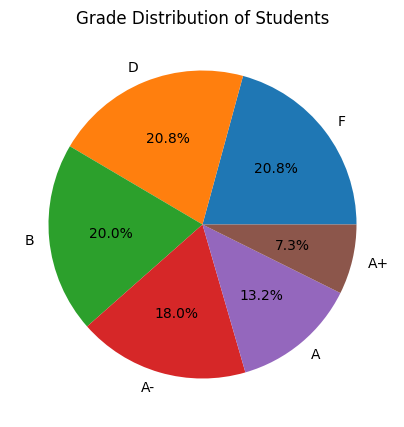

In [30]:
st['Grade'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.title("Grade Distribution of Students")
plt.ylabel('')
plt.show()

In [31]:
st['Presents'] = 93-st['Absences_from_School']

Ranking Students based on their total_mark->Term3_Mark->Term2_Mark->Term1_Mark->Presents->Age

In [32]:
st['Final_Rank'] = st[['Total_Mark','Term3_Mark', 'Term2_Mark', 'Term1_Mark', 'Presents','Age']].apply(tuple, axis=1).rank(method='min', ascending=False).astype(int)
st.sort_values(by='Final_Rank')

,School_Name,Gender,Age,Location,Travel_Time,Weekly_Study_Time,Family_Support,Extra_Curricular,Higher_Ed_Exp,Internet_Availability,...,Absences_from_School,Final Grade,Term1_Mark,Term2_Mark,Term3_Mark,Total_Mark,Average,Grade,Presents,Final_Rank
47,Gabriel Pereira,Male,16,Urban,<15 mins,>10 hours,no,yes,yes,yes,...,4,20,95,95,100,290,96.67,A+,89,1
110,Gabriel Pereira,Male,15,Urban,<15 mins,<2 hours,no,yes,yes,yes,...,6,19,90,95,95,280,93.33,A+,87,2
113,Gabriel Pereira,Male,15,Urban,<15 mins,<2 hours,no,no,yes,yes,...,10,19,90,95,95,280,93.33,A+,83,3
374,Mousinho da Silveira,Female,18,Rural,15 to 30 mins,5 to 10 hours,no,no,yes,yes,...,0,19,95,90,95,280,93.33,A+,93,4
286,Gabriel Pereira,Female,18,Urban,<15 mins,5 to 10 hours,yes,no,yes,yes,...,5,19,90,90,95,275,91.67,A+,88,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Gabriel Pereira,Female,18,Rural,15 to 30 mins,2 to 5 hours,yes,no,no,yes,...,0,0,30,0,0,30,10.00,F,93,391
242,Gabriel Pereira,Male,16,Urban,<15 mins,<2 hours,no,yes,yes,yes,...,0,0,30,0,0,30,10.00,F,93,392
153,Gabriel Pereira,Male,19,Urban,<15 mins,<2 hours,yes,no,no,yes,...,0,0,25,0,0,25,8.33,F,93,393
144,Gabriel Pereira,Male,17,Urban,<15 mins,<2 hours,yes,no,yes,yes,...,0,0,25,0,0,25,8.33,F,93,394


Visualizations

Box plot of total marks by locations

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10772\1564260719.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(marks_by_location, labels=locations)


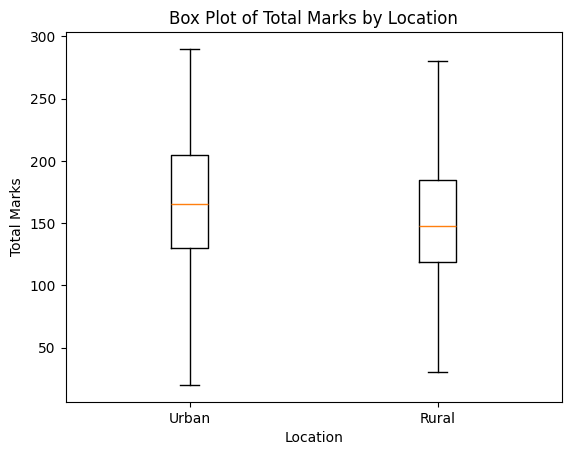

In [33]:
locations = st['Location'].unique()  # Find unique locations
marks_by_location = [st[st['Location'] == loc]['Total_Mark'] for loc in locations]

plt.boxplot(marks_by_location, labels=locations)
plt.title("Box Plot of Total Marks by Location")
plt.xlabel("Location")
plt.ylabel("Total Marks")
plt.show()

Box plot of total mark by gender

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10772\1489892946.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(marks_by_location, labels=locations)


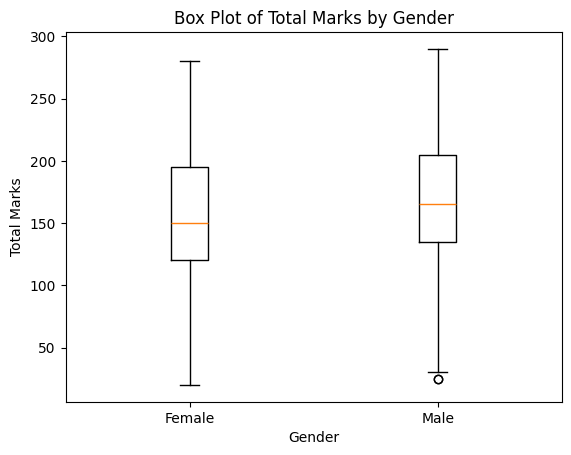

In [34]:
locations = st['Gender'].unique()  # Find unique locations
marks_by_location = [st[st['Gender'] == loc]['Total_Mark'] for loc in locations]

plt.boxplot(marks_by_location, labels=locations)
plt.title("Box Plot of Total Marks by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Marks")
plt.show()

Student's health pie chart

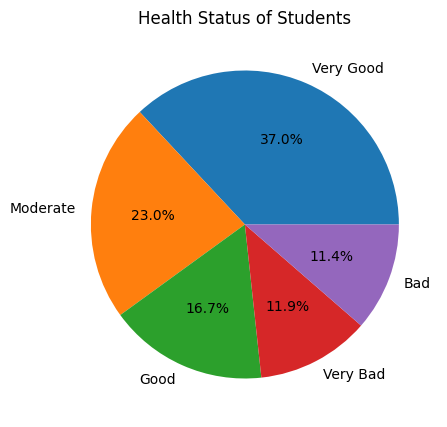

In [35]:
st['Health_Status'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.title("Health Status of Students")
plt.ylabel('')
plt.show()

side by side pie charts

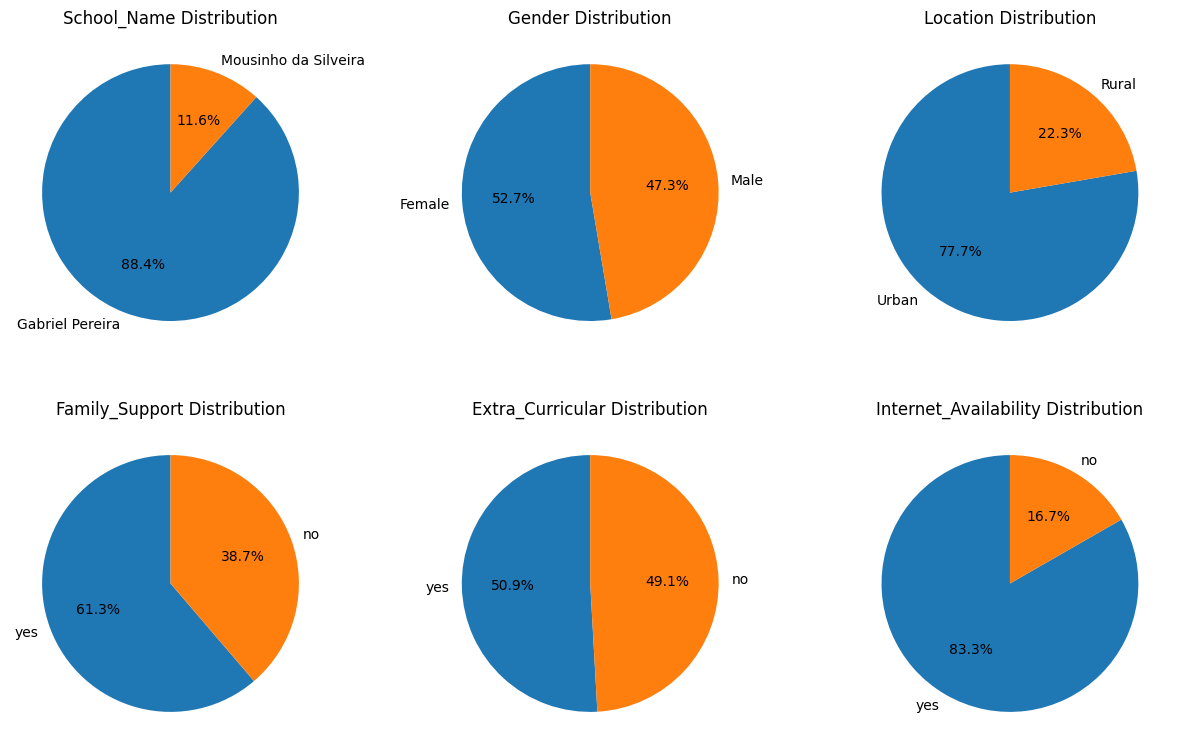

In [36]:
# Sample Data
data = {
    'School_Name': st['School_Name'],
    'Gender': st['Gender'],
    'Location': st['Location'],
    'Family_Support': st['Family_Support'],
    'Extra_Curricular': st['Extra_Curricular'],
    'Internet_Availability': st['Internet_Availability']
}
dt = pd.DataFrame(data)

# List of categorical columns to create pie charts for
columns = ['School_Name', 'Gender', 'Location', 'Family_Support', 'Extra_Curricular', 'Internet_Availability']

# Define the number of rows and columns for the subplots grid
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate required rows to fit all columns

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Generate pie charts for each column
for i, col in enumerate(columns):
    counts = dt[col].value_counts()  # Get counts for each category
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"{col} Distribution")

# Hide any empty subplots if columns don't fill grid
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Box Plot for Distribution of Marks Per Term

C:\Users\LEGION\AppData\Local\Temp\ipykernel_10772\319227307.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=['Term 1', 'Term 2', 'Term 3'])


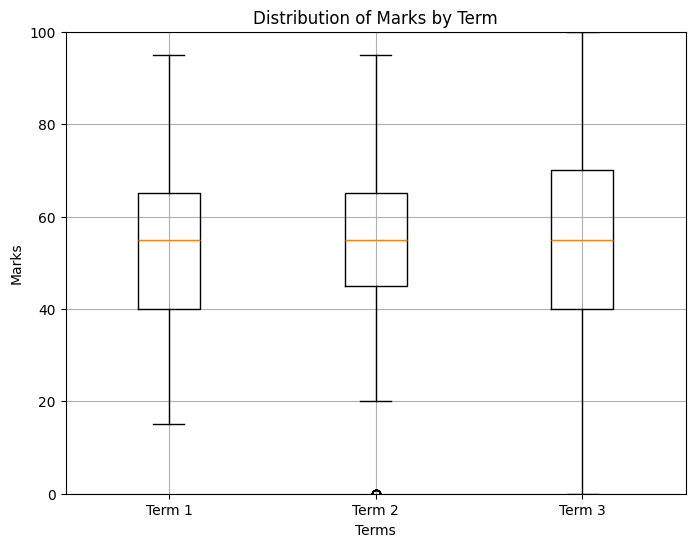

In [37]:
# Reformat data for boxplot
boxplot_data = [st['Term1_Mark'], st['Term2_Mark'], st['Term3_Mark']]

# Plotting
plt.figure(figsize=(8, 6))
plt.boxplot(boxplot_data, labels=['Term 1', 'Term 2', 'Term 3'])
plt.title('Distribution of Marks by Term')
plt.xlabel('Terms')
plt.ylabel('Marks')
plt.ylim(0, 100)
plt.grid(True)
plt.show()


Histogram of Average Column

<Axes: ylabel='Frequency'>

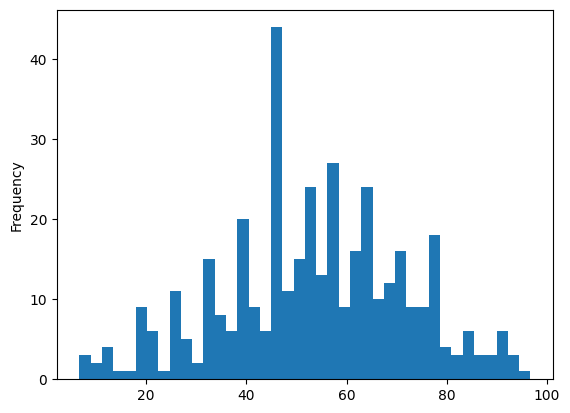

In [38]:
st['Average'].plot.hist(bins=40)

Density plot of Average Column

<Axes: ylabel='Density'>

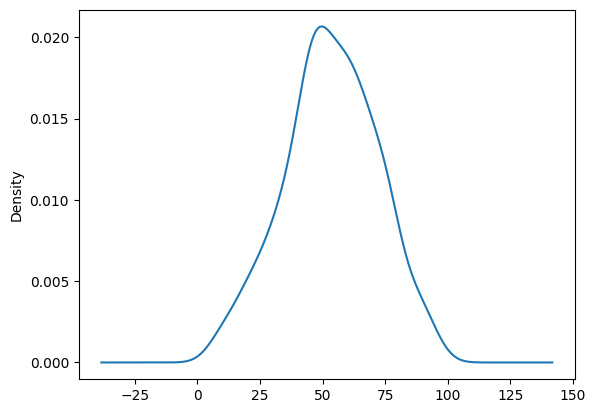

In [39]:
st['Average'].plot.density()

<Axes: xlabel='Average', ylabel='Count'>

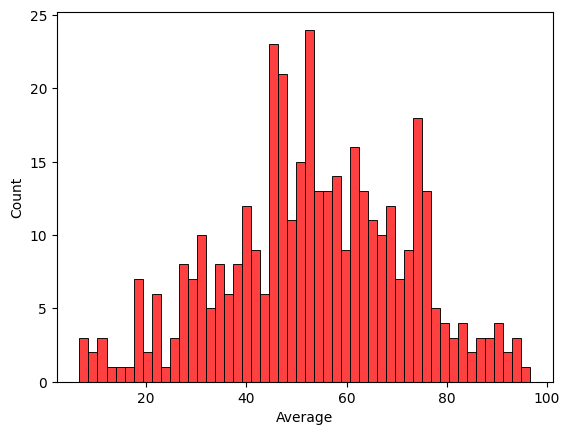

In [40]:
sns.histplot(st['Average'], bins=50, color='red')

<Axes: xlabel='Presents', ylabel='Count'>

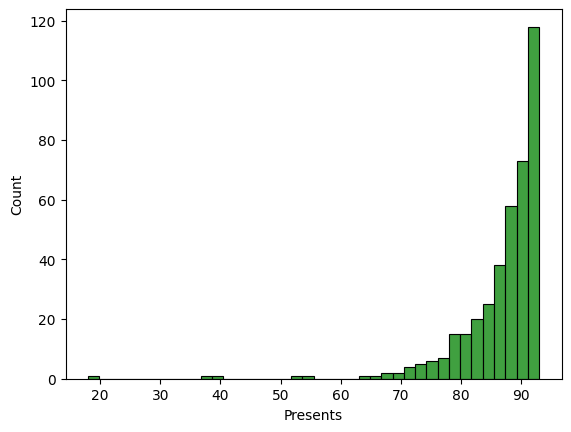

In [41]:
sns.histplot(st['Presents'], bins=40, color='green')
#showing higher attendences

More Grade Dependencies

In [42]:
st.columns

Index(['School_Name', 'Gender', 'Age', 'Location', 'Travel_Time',
       'Weekly_Study_Time', 'Family_Support', 'Extra_Curricular',
       'Higher_Ed_Exp', 'Internet_Availability', 'Goint_Out', 'Health_Status',
       'Absences_from_School', 'Final Grade', 'Term1_Mark', 'Term2_Mark',
       'Term3_Mark', 'Total_Mark', 'Average', 'Grade', 'Presents',
       'Final_Rank'],
      dtype='object')

Comparing School Performances

In [43]:
scl_per = st.groupby('School_Name')['Total_Mark'].mean()
scl_per

School_Name
Gabriel Pereira         161.060172
Mousinho da Silveira    153.586957
Name: Total_Mark, dtype: float64

In [44]:
scl_att = st.groupby('School_Name')['Presents'].mean()
scl_att

School_Name
Gabriel Pereira         87.034384
Mousinho da Silveira    89.239130
Name: Presents, dtype: float64

In [45]:
ext_per = st.groupby('Extra_Curricular')['Total_Mark'].mean()
ext_per

Extra_Curricular
no     157.886598
yes    162.412935
Name: Total_Mark, dtype: float64

In [46]:
int_per = st.groupby('Internet_Availability')['Total_Mark'].mean()
int_per

Internet_Availability
no     147.500000
yes    162.735562
Name: Total_Mark, dtype: float64

In [47]:
travel_per = st.groupby('Travel_Time')['Total_Mark'].mean()
travel_per

Travel_Time
15 to 30 mins        154.439252
30 mins to 1 hour    147.826087
<15 mins             164.688716
>1 hour              128.125000
Name: Total_Mark, dtype: float64

Study habits and performance

In [48]:
std_per = st.groupby('Weekly_Study_Time')['Total_Mark'].mean()
std_per

Weekly_Study_Time
2 to 5 hours     156.641414
5 to 10 hours    174.769231
<2 hours         153.809524
>10 hours        175.925926
Name: Total_Mark, dtype: float64

Correlation between weekly study time and health status, stacked bar chart

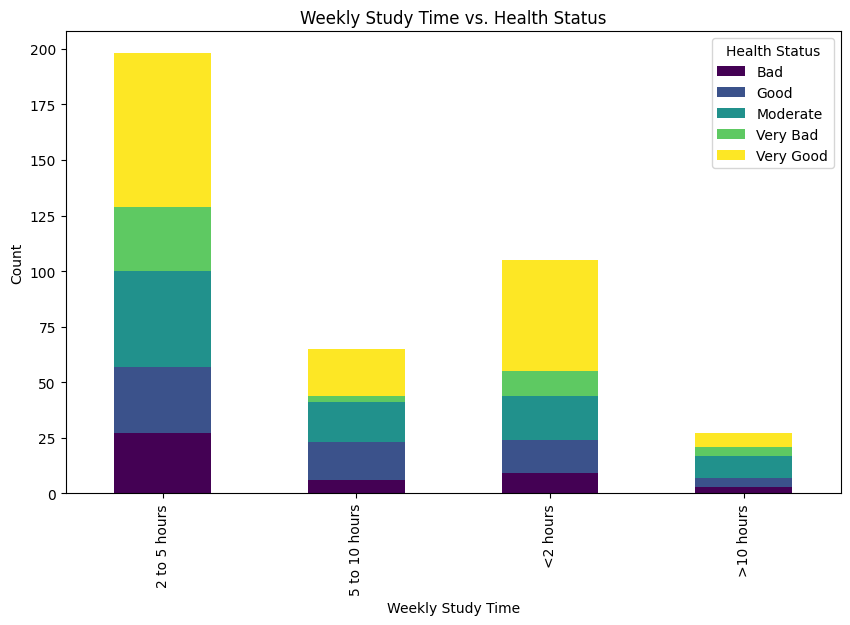

In [49]:
study_health_ct = pd.crosstab(st['Weekly_Study_Time'], st['Health_Status'])

# 2. Stacked Bar Chart
study_health_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Weekly Study Time vs. Health Status")
plt.xlabel("Weekly Study Time")
plt.ylabel("Count")
plt.legend(title="Health Status")
plt.show()

Bar Plot of Average Marks by Health_Status

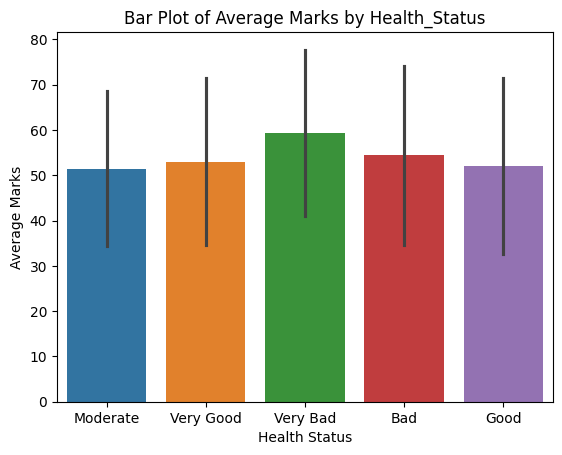

In [50]:
sns.barplot(x=st['Health_Status'], y=st['Average'], data=st, errorbar='sd', hue=st['Health_Status'])
plt.title('Bar Plot of Average Marks by Health_Status')
plt.xlabel('Health Status')
plt.ylabel('Average Marks')
plt.show()

Bar Plot of Average Marks by Weekly_Study_Time

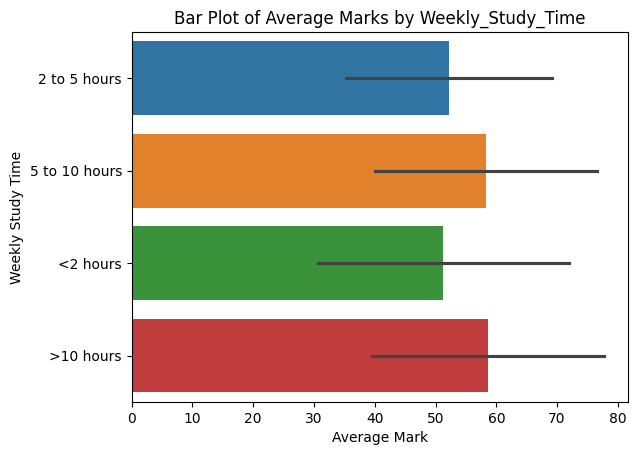

In [51]:
sns.barplot(x=st['Average'], y=st['Weekly_Study_Time'], data=st, errorbar='sd', hue=st['Weekly_Study_Time'])
plt.title('Bar Plot of Average Marks by Weekly_Study_Time')
plt.xlabel('Average Mark')
plt.ylabel('Weekly Study Time')
plt.show()